In [7]:
from huggingface_hub import notebook_login

notebook_login()

In [8]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image

# Load the fine-tuned model and processor
model = VisionEncoderDecoderModel.from_pretrained("rockerritesh/trOCR_ne")
processor = TrOCRProcessor.from_pretrained("rockerritesh/trOCR_ne")

config.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/178M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 384,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 6,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.47.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 384,
  "d_model": 256,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 1024,
  "decode

generation_config.json:   0%|          | 0.00/303 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/529k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

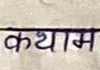

In [20]:
from PIL import Image

# Open an image
image = Image.open("/kaggle/input/nepali-handwritten-images-for-text-detection/test/125.jpeg")

# Define crop box (left, upper, right, lower)
crop_box = (190, 50, 290, 120)  # Change as needed

# Crop the image
cropped_image = image.crop(crop_box)

# Save the cropped image
cropped_image.save("cropped.jpg")

# Show the cropped image
cropped_image

In [21]:
# Load an image
image = Image.open("cropped.jpg").convert("RGB")

# Preprocess image and generate predictions
pixel_values = processor(images=image, return_tensors="pt").pixel_values
output_ids = model.generate(pixel_values, num_beams=8, max_length=470, early_stopping=True)
decoded_text = processor.tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0]

print("Recognized Text:", decoded_text)

Recognized Text: कयाम
